# **Unsupervised Machine Learning**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
data = {
    'CustomerID': range(1, 11),
    'Age': [19, 21, 20, 23, 31, 22, 35, 23, 64, 30],
    'Annual Income (k$)': [15, 15, 16, 16, 17, 17, 18, 18, 19, 19],
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72]
}
df = pd.DataFrame(data)
print(df.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0           1   19                  15                      39
1           2   21                  15                      81
2           3   20                  16                       6
3           4   23                  16                      77
4           5   31                  17                      40


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop('CustomerID', axis = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# data is ready for clustering

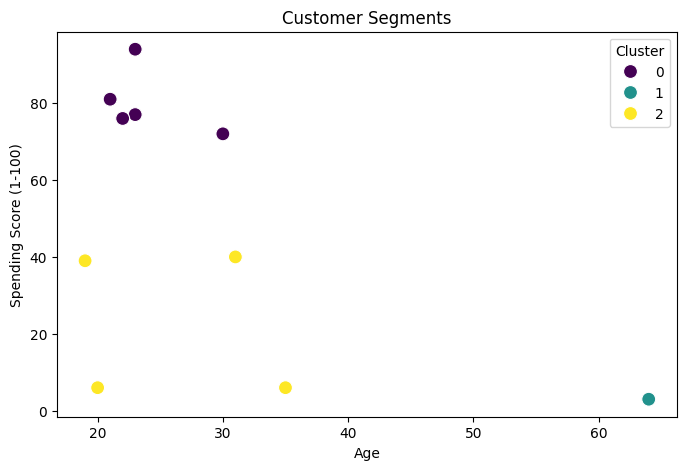

In [ ]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
# Visualize clusters using Age and Spending Score
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments')
plt.show()

# **PCA for Image Compression**

Load and Preprocess the Image

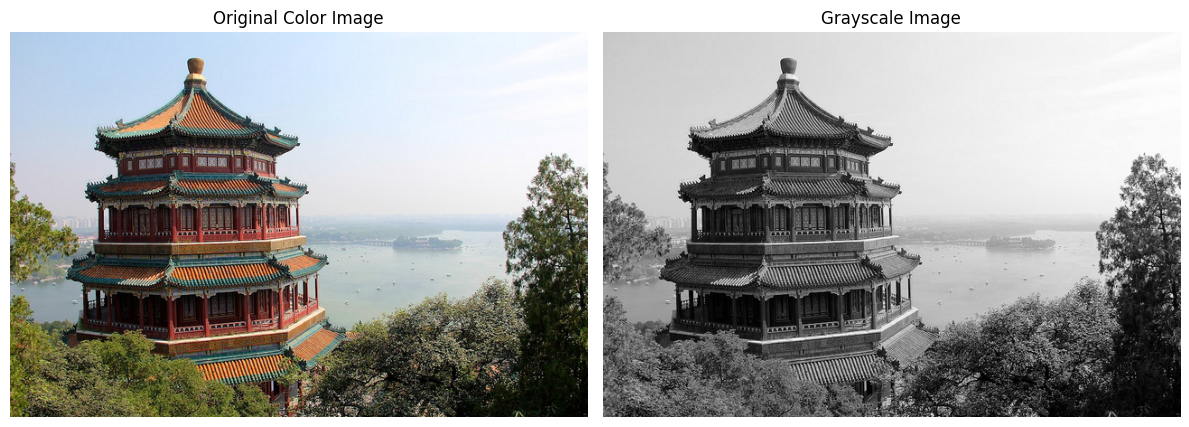

In [ ]:
from sklearn.datasets import load_sample_image
from skimage.color import rgb2gray
from sklearn.preprocessing import StandardScaler

china = load_sample_image('china.jpg')
gray = rgb2gray(china)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original color image
axes[0].imshow(china)
axes[0].set_title("Original Color Image")
axes[0].axis('off')

# Grayscale image
axes[1].imshow(gray, cmap='gray')
axes[1].set_title("Grayscale Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Standardize pixel values
scaler = StandardScaler()
gray_scaled = scaler.fit_transform(gray)

Apply PCA to Compress the Image

In [ ]:
#Since each row of the image can be treated as a sample and each column as a feature, we'll apply PCA row-wise.

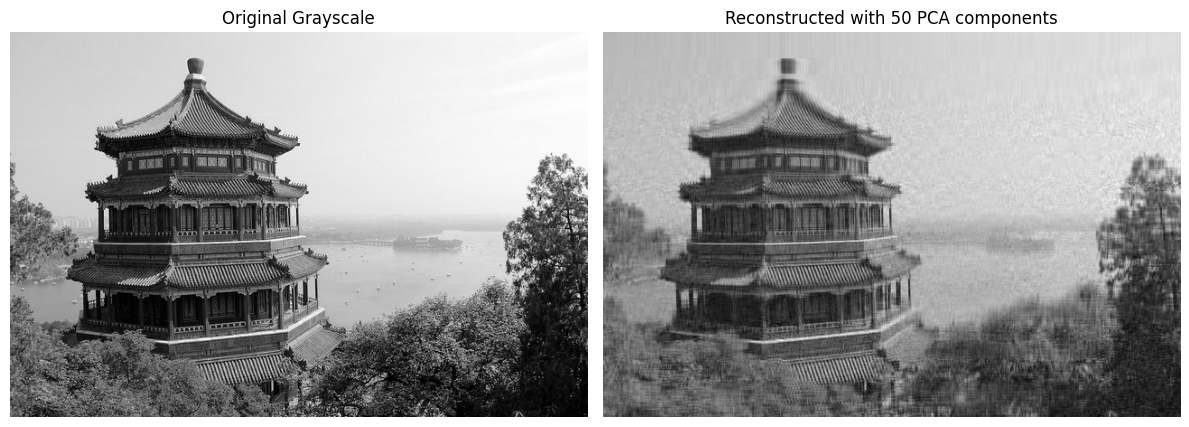

In [ ]:
from sklearn.decomposition import PCA
n_components = 50
pca = PCA(n_components=n_components)
gray_pca = pca.fit_transform(gray)

# Reconstruct the image
gray_reconstructed = pca.inverse_transform(gray_pca)

# Plot original vs reconstructed
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(gray, cmap='gray')
axes[0].set_title("Original Grayscale")
axes[0].axis('off')

axes[1].imshow(gray_reconstructed, cmap='gray')
axes[1].set_title(f"Reconstructed with {n_components} PCA components")
axes[1].axis('off')

plt.tight_layout()
plt.show()

Evaluate Compression

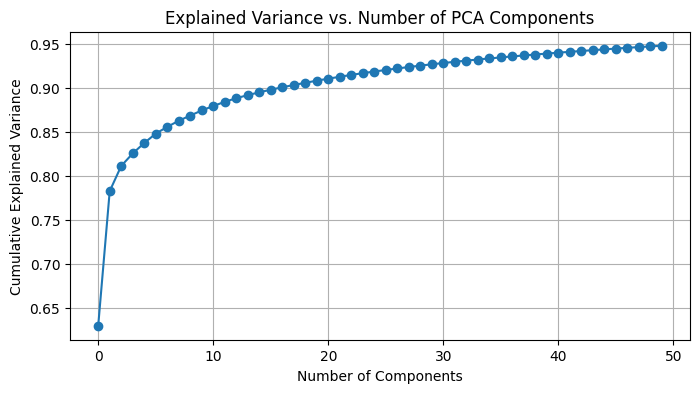

In [ ]:
# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Plot variance explained by each component
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of PCA Components')
plt.grid(True)
plt.show()

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Print how many components are needed to reach 90% variance
components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components needed for 90% variance: {components_90}")

# Optionally, print variance explained by the first few components
for i in range(5):
    print(f"Component {i+1} explains {pca.explained_variance_ratio_[i]*100:.2f}% variance")

Number of components needed for 90% variance: 17
Component 1 explains 62.99% variance
Component 2 explains 15.28% variance
Component 3 explains 2.86% variance
Component 4 explains 1.42% variance
Component 5 explains 1.18% variance


In [ ]:
# Component 1 explains 62.99% variance:
# The very first principal component alone captures almost 63% of the total information (variance) in the image. This means most of the image’s structure can be represented by this one component!

# Component 2 explains 15.28% variance:
# Adding the second component boosts the captured info by another 15%, so together, the first two explain roughly 78%.

# Components 3, 4, 5... explain smaller chunks of variance, showing diminishing returns as we add more.

# Number of components needed for 90% variance: 17:
# It means keeping the first 17 components retains about 90% of the image’s original information. So if we compress the image by projecting it onto those 17 components, we get a good balance between compression and quality.